In [7]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
from keras.models import load_model,save_model,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [9]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [12]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

In [14]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),validation_split=0.2)

Epoch 1/50
1563/1563 [==============================] - 21s 6ms/step - loss: 1.4040 - acc: 0.4980 - val_loss: 1.1318 - val_acc: 0.5985
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0368 - acc: 0.6353 - val_loss: 0.9867 - val_acc: 0.6538
Epoch 3/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9034 - acc: 0.6835 - val_loss: 0.9244 - val_acc: 0.6759
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8127 - acc: 0.7167 - val_loss: 0.8980 - val_acc: 0.6842
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7298 - acc: 0.7447 - val_loss: 0.9051 - val_acc: 0.6836
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6660 - acc: 0.7684 - val_loss: 0.8672 - val_acc: 0.7048
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6029 - acc: 0.7855 - val_loss: 0.9645 - val_acc: 0.6937
Epoch 8/50
1563/1563 [==============================] - 9s 6m

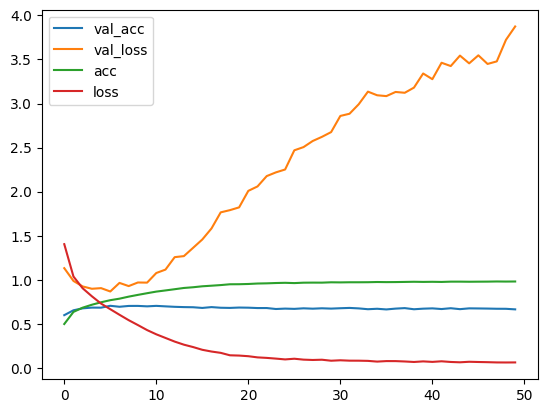

In [17]:
plt.plot(history.history['val_acc'],label='val_acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()

In [18]:
y_pred = model.predict(x_test[5].reshape(1,32,32,3))

1/1 [==============================] - 0s 151ms/step


In [19]:
y_pred_label = np.argmax(y_pred)
y_pred_label

6

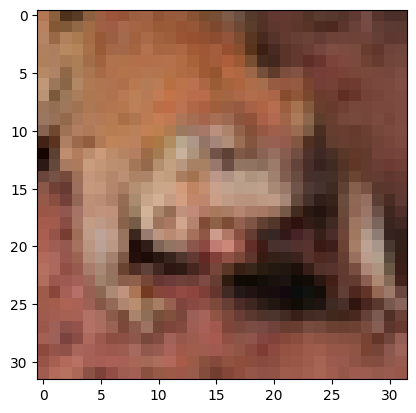

In [20]:
plt.imshow(x_test[5])